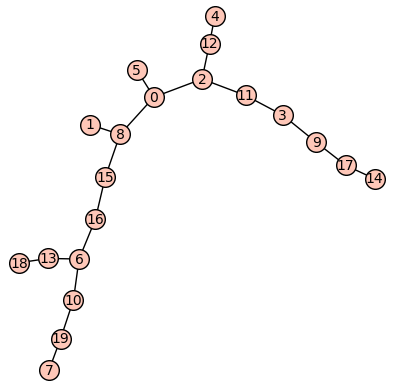

[2, 8, 9, 13, 19]


2.0

In [2]:
from sage.graphs.connectivity import connected_components
from sage.graphs.connectivity import connected_components_number

def random_drevo(m): #vrne random drevo z m vozlišči
    drevo = graphs.RandomTree(m)
    return drevo

G = random_drevo(20)
G.show()

def najkrajsa_razdalja(G, st_centrov):
    K = st_centrov
    razdalje = G.distance_all_pairs()

    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True) #x_uv = 1 če mesto u spada k skladišču v (mestu v s skladiščem)
    y = p.new_variable(binary=True) # y_v = 1 če je v mestu v skladišče

    p.set_objective(p['R']) # največja razdalja je spremenljivka

    for u in G:
        p.add_constraint(sum(x[u, v] for v in G) == 1) #za vsako mesto u bo veljalo, da spada pod neko območje mesta v s skladiščem

    p.add_constraint(sum(y[v] for v in G) == K) #vsota skladišč je enaka K

    for u in G:
        for v in G:
            p.add_constraint(x[u, v] <= y[v]) #ne sme se zgoditi, da mesto u pade v območje mesta v, v mestu v pa sploh ni skladišča

    for u in G:
        for v in G:
            if v in razdalje[u]:
                p.add_constraint(razdalje[u][v] * x[u, v] <= p['R']) # če sta vozlišči v isti povezani komponenti, potem omejimo največjo razdaljo                                                                        do skladišča
            else:
                p.add_constraint(x[u, v] == 0) # sicer mesto u ne more pripadati skladišču v
    max_razdalja = p.solve()
    skladisca = [k for k, v in p.get_values(y).items() if v == 1]
    print(skladisca)
    return max_razdalja

najkrajsa_razdalja(G,5)
